In [1]:
import pandas as pd
import seaborn as sns
import os

import matplotlib.pyplot as plt

%matplotlib inline

**Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), 
имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).
В качестве ответа укажите сумму по колонке quantity**

In [3]:
os.getcwd()

'/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-alykov/PL/My_homeworks/miniproject_3'

In [4]:
path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-r-alykov/shared/homeworks/python_ds_miniprojects/4/data/'

In [5]:
dfs_list = []

In [13]:
for date in os.listdir(path): # проходимся по папкам с датами
    for name in os.listdir(path + date): # проходимся по папкам с именами
        file_path = f'{path}{date}/{name}/data.csv' # создаем путь к файлу
        temp_df = pd.read_csv(file_path, sep=',', index_col = 0) # считываем файлы,index_col убирает первый столбец как индекс
        temp_df[['name', 'date']] = name, date # создаем колонки name и data
        dfs_list.append(temp_df) # добавляем временный df в пустой список

In [7]:
df = pd.concat(dfs_list).reset_index(drop=True) # резет индекс вернет первый столбец в порядковый вид, 
                                                # а аргумент drop сбросит появившеюся колонку index

In [8]:
df

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


In [9]:
df.quantity.sum()

480

**Выясните, какие пользователи купили больше всего товаров.**

In [11]:
top_buyers = df\
    .groupby(['name'], as_index=False)\
    .agg({'quantity': 'sum'})\
    .sort_values('quantity', ascending=False)\
    .head(11)

In [12]:
top_buyers

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


**Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:
по оси x – идентификаторы товаров (product_id) 
по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)**

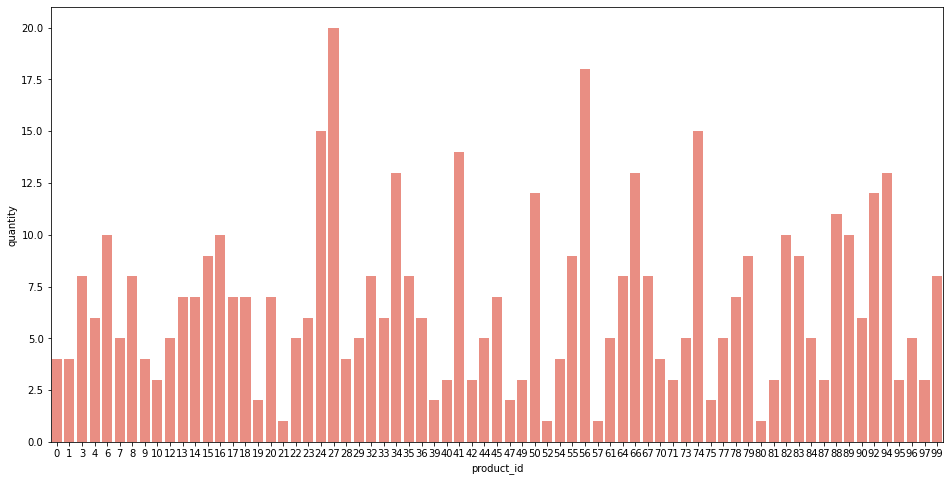

In [14]:
products_sold = df\
    .groupby(['product_id'], as_index=False)\
    .agg({'quantity': 'sum'})\
    .sort_values('quantity', ascending=False)

plt.figure(figsize=(16, 8))
sns.barplot(x='product_id', y='quantity', color='salmon', data=products_sold)

**Посмотрим на продажи по дням! Для визуализации снова используйте барплот, 
только теперь по оси x будут дни, по которым у нас есть данные**

In [16]:
buys_by_days = df\
    .groupby(['date'], as_index=False)\
    .agg({'quantity': 'sum'})\
    .sort_values('quantity', ascending=False)

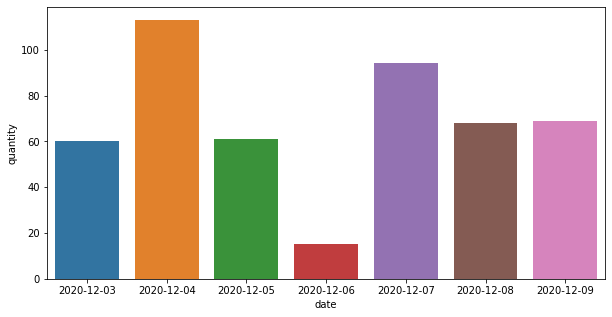

In [81]:
plt.figure(figsize=(10, 5))
sns.barplot(x='date', y='quantity', data=buys_by_days, order=buys_by_days.sort_values('date').date)

**Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.**

In [78]:
repeat_buys = df\
    .drop_duplicates(subset=['date', 'product_id', 'name'])\
    .groupby(['name', 'product_id'], as_index=False)\
    .agg({'date': 'count'})\
    .query('date > 1')

In [79]:
repeat_buyers

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
